# INTRODUCTION
In the course of learning data analyst. it has become neccesary to test my data wrangling knowledge which is one of the most difficult stage in data analyst course due to getting, cleaning and tiding of dirty and unkept data.
In this project we are to investigate the rating of dogs by Twitter user, why did Twitter users rated some particular breeds of dog compared to others.
We are going to centered our focus on dog phases which include doggo, floofer, pupper and puppo
1 - Puppies are considered puppies within the first 8 month after born, a todler stage
2 - Doggo are considered doggo whey are four years old i.e adulhood stage
4 - Floofer are considered fllofer when dog is fully grown
4 - Puppo is a transisitional phase between pupper & doggo i.e equivalent to teenage dog

Data from Twitter was used in the project and the dataset used is listed bellow, however some columns will be renamed in the process of cleaning the data likewise some will be deleted

### 1- Twitter_archive dataset
This dataset is characterised by the following columns:
 0   tweet_id                     
 1   in_reply_to_status_id       
 2   in_reply_to_user_id         
 3   timestamp                   
 4   source                      
 5   text                       
 6   retweeted_status_id         
 7   retweeted_status_user_id    
 8   retweeted_status_timestamp  
 9   expanded_urls                
 10  rating_numerator             
 11  rating_denominator           
 12  name                         
 13  doggo                       
 14  floofer                     
 15  pupper                      
 16  puppo 

###  2- Image_prediction dataset
This dataset is characterised by the following columns:

 0    tweet_id    
 1    jpg_url     
 2    img_num     
 3    p1       
 4    p1_conf     
 5    p1_dog      
 6    p2     
 7    p2_conf  
 8    p2_dog  
 9    p3         
 10   p3_conf     
 11   p3_dog  
 
### 3- Twitter_Json file

 0   created_at                     
 1   id                                      
 2   id_str                                     
 3   full_text                                  
 4   truncated                                    
 5   display_text_range                          
 6   entities                                    
 7   extended_entities                           
 8   source                                      
 9   in_reply_to_status_id                      
 10  in_reply_to_status_id_str                  
 11  in_reply_to_user_id                        
 12  in_reply_to_user_id_str                    
 13  in_reply_to_screen_name                    
 14  user                                        
 15  geo                                        
 16  coordinates                                
 17  place                                      
 18  contributors                              
 19  is_quote_status                               
 20  retweet_count                               
 21  favorite_count                              
 22  favorited                                  
 23  retweeted                                    
 24  possibly_sensitive                         
 25  possibly_sensitive_appealable              
 26  lang                                        
 27  retweeted_status                            
 28  quoted_status_id                           
 29  quoted_status_id_str                       
 30  quoted_status                  

#### The main reason of this project is to gather the data, assess and clean it but however some insights were also noted and observed since data analysis is not complete without getting insight from it.
Since we are dealing with rating of Dogs, It is of important to know the reasons why Twitter users rated some Dogs above others.
These are what we are going to be looking into to analyze our dataset.

### QUESTIONS
It is time to ask ourselves some questions that begs for answer which will lead us to fact and truth about the twitter users ratings

###### 1- What type of breeds is most popular??
###### 1- which of the breeds hihgest favourite count??
###### 3- which year do we highest user's rating??
###### 4- which of the season does user's has higher ratings??

The questions are widely open and

we are starting our analysis now.

# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import os
import requests
import json
import glob
import seaborn as snb
%matplotlib inline
from matplotlib import pyplot as plt

# 1 - DATA GATHERING

##### 1 -     twitter-archive-enhanced dataset was downloaded manually

##### 2 - Image prediction dataset was downloaded programatically 
 using this url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

##### 3 - twitter_json dataset was downloaded manually


### 1.2 - twitter-archive-enhanced dataset

In [13]:
df = pd.read_csv('twitter-archive-enhanced.csv', sep =',')

### view the data

In [14]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 1. 3 - Download Image prediction dataset programatically

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [16]:
with open ('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

### load the image-predictions.tsv into dataframe and view it

In [17]:
df1 = pd.read_csv('image-predictions.tsv', sep = '\t')

In [18]:
df1.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 1.4 - twitter-json dataset

### load the tweet-json.txt into dataframe and view it

In [19]:
df2 = pd.read_json('tweet-json copy.txt' , lines = True, encoding='utf-8-sig')
df2.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# 2 - ASSESING THE DATASETS

In [ ]:
# these are my data 3 dataframe
df 
df1 
df2 

### 2.1 Assessing the datasets visually

In [20]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [21]:
df1.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [22]:
df2.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### 2.2 - Programatically assesing the datasets

### check the information about the dataset such as data type, columns name and number

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### you can see we have wrong data type timestamp which is object instead of datetime with some null columns

In [24]:
#show my dataset dimension
df.shape

(2356, 17)

In [25]:
#checking for duplicate in tweet_id column
df.tweet_id.duplicated().sum()

0

In [31]:
#checking numerator that is > than 10
df[df['rating_numerator'] > 10].count()

tweet_id                      1455
in_reply_to_status_id           60
in_reply_to_user_id             60
timestamp                     1455
source                        1455
text                          1455
retweeted_status_id            153
retweeted_status_user_id       153
retweeted_status_timestamp     153
expanded_urls                 1412
rating_numerator              1455
rating_denominator            1455
name                          1455
doggo                         1455
floofer                       1455
pupper                        1455
puppo                         1455
dtype: int64

we have 1455 users that rated the dog 50/10

In [32]:
#check names value count
df['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Fwed         1
Jeffri       1
Rueben       1
Remus        1
Clyde        1
Name: name, Length: 957, dtype: int64

We have a aplhabet as name in the name column and they are 55 in numbers

In [33]:
#check name colunm with only alphabet 'a' as name
df[df.name == 'a'].count()

tweet_id                      55
in_reply_to_status_id          0
in_reply_to_user_id            0
timestamp                     55
source                        55
text                          55
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 55
rating_numerator              55
rating_denominator            55
name                          55
doggo                         55
floofer                       55
pupper                        55
puppo                         55
dtype: int64

In [34]:
#check if their are any names that started with small letter
df['name'].str.islower().sum()

109

In [35]:
#check retweet tweets by users
df.retweeted_status_user_id.count()

181

In [36]:
#check the columns name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [37]:
#check the distribution of the dataset
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Assessing df1 (Twitter_image_predictions)

In [38]:
#check the information about the dataset such as data type, columns name and number
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
#checking for duplicate in tweet_id column
df1.tweet_id.duplicated().sum()

0

In [40]:
#check for duplicate in jpg_url
df1.jpg_url.duplicated().sum()

66

In [41]:
#check if first predictions are dogs and their total numbers
df1['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [42]:
#check if first predictions are dogs and the values
df1['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [43]:
#check if first predictions are dogs and the values
df1['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [44]:
#check for any lost in the dataset
df1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Assessing df2 (tweet-json.text)

In [45]:
df2 = pd.read_json('tweet-json copy.txt' , lines = True, encoding='utf-8-sig')

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

it was observed that many columns are not useful in the data set

In [47]:
#check the dataset dimenssion
df.shape

(2356, 17)

In [48]:
#check the languages in which users tweet
df2[df2.lang != 'es']
df2.lang.value_counts()

en     2336
und       7
in        3
nl        3
et        1
ro        1
tl        1
es        1
eu        1
Name: lang, dtype: int64

In [49]:
#check duplicated id
df2.id.duplicated().sum()

0

In [50]:
#check the count of retweeted tweets
df2['retweeted_status'].count()

179

In [51]:
#sample check the dataset
df2.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# 3 - Data Tidiness and Qualities 

### Data Tidiness and Qualities for twiter_archive_enhance dataframe(df, df_clean1)

### Tideness
1 - Wrong data type in timestamp, after converted back to datetime format, i deleted it
2 - Renaming of the name columns
4 - Create Dog phase column

## Qualities

 - Accuracy: incorrect column names, replacing None to NaN values, 
 - Validity: converting columns back to thier appriopriate data type
 - Consistency: image with ids likewise original tweet were needed
 
###### 1 - Empty cells with Nan value in doggo, floofer, puppo and pupper, take them to dog_phase column and delete their columns
######  2 - change all the names that thier first letter starts with small letter to capital letter
###### 3 - Setting denominator standard to 10
###### 4 - Modified abnormal numerator ratings
###### 5 - Rename the text column with tweet
###### 6 - Replace cells with 'a' values with NaN

#### Data Qualities for twitter_json data frame(df2, df_clean3)

###### 1- Rename the id column to tweet_id
###### 2- Delete all the unuseful column

#### Data qualities image_prediction dataframe(df1, df_clean2)

###### 1 - p1, p2, p3 was properlly renamed for better understanding
###### 2 - p1_dog, p2_dog, p3_dog were renamed for easy understanding
###### 3 - dropping of duplicated values in img_url column
###### 4 - delete the img_num

# 4 - CLEANING OF DATA

### since we have finished assessing df dataframe, the lets save it and keep the original copy should in case of any mistake, we can just pick the original copy back. lets wrangle the data

In [54]:
#Copy of the main dataset df and it is named df_clean1 which is best for cleaning data
df_clean1 = df.copy()

In [55]:
#view it
df_clean1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


# Define

# Code

In [56]:
#use loop to to filter dog phases
phases = ['doggo','pupper', 'floofer', 'puppo']
for m in phases:
    df_clean1[m] = df_clean1[m].replace('None', '')

# Test

In [57]:
#lets check it out
df_clean1.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1696,681242418453299201,NaN,NaN,2015-12-27 22:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Champ. He's being sacrificed to the Az...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681242418...,10,10,Champ,,,,
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,,,,


# Define


# Code

In [58]:
#use cat to combine and create dog phases
df_clean1['dog_phase'] = df_clean1.doggo.str.cat(df_clean1.floofer).str.cat(df_clean1.pupper).str.cat(df_clean1.puppo)

# Test

In [59]:
#lets check it out
df_clean1.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_phase
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,,,
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,,,,,


# Define

# Code

In [60]:
#lets delete the doggo, pupper, floofer and puppo column
df_clean1 = df_clean1.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1)

#replace '' values in dog_phase column with Nan
df_clean1['dog_phase'] = df_clean1['dog_phase'].replace('', np.nan)

# Test

In [61]:
#lets check it out
df_clean1.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_phase
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN


# Define

# Code

In [62]:
#convert the timestamp to datetime data type
df_clean1['timestamp'] = pd.to_datetime(df_clean1['timestamp'])

# Test

In [64]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# Define

# Code

In [67]:
#create month, year, weekday column by extracting it from timestamp
df_clean1['Year'] = df_clean1['timestamp'].dt.year
df_clean1['Month'] = df_clean1['timestamp'].dt.month
df_clean1['WeekDay'] = df_clean1['timestamp'].dt.day_name()

# Test

In [68]:
#chect it out
df_clean1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,Year,Month,WeekDay
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,2017,8,Tuesday
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,2017,8,Tuesday
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,2017,7,Monday
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,2017,7,Sunday
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,2017,7,Saturday


# Define

# Code

In [69]:
#Delete timestamp column
df_clean1 = df_clean1.drop('timestamp', 1)

# Test

In [70]:
#check it out
df_clean1.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,Year,Month,WeekDay


# Define

# Code & Test

In [71]:
#check ratings_denominator grater than 10
sum(df_clean1.rating_denominator > 10)

20

# Define

# Code

In [72]:
#set rating_denominator to 10 which is the standard
for i in df_clean1.rating_denominator:
    df_clean1.rating_denominator = 10.0

# Test

In [73]:
#check ratings_denominator grater than 10
sum(df_clean1.rating_denominator > 10)

0

# Define

# Code

In [74]:
#do a check using for loop to correct rating_numerator score that were rated above 20

for i in range (1, len(df_clean1.rating_numerator),1):

#check if the rating_numerator is less than and equal, if true, then continue
  
    if df_clean1.rating_numerator.iloc[i]<=20:continue

#check if the rating_numerator is above 20 and less than equal to 200, if true, multiply if by 0.1
    
    elif df_clean1.rating_numerator.iloc[i] > 20 and df_clean1.rating_numerator.iloc[i]<=200:
        df_clean1.rating_numerator.iloc[i] = df_clean1.rating_numerator.iloc[i]*0.1

#check if the rating_numerator is above 200 and less than equal to 200, if true, multiply if by 0.01
    
    elif df_clean1.rating_numerator.iloc[i]>200:
            df_clean1.rating_numerator.iloc[i] = df_clean1.rating_numerator.iloc[i]*0.01

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Test

In [75]:
#check it out if there is rating_numerator that is above 20
sum(df_clean1.rating_numerator >20)

0

In [76]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   float64
 10  rating_denominator          2356 non-null   float64
 11  name                        2356 non-null   object 
 12  dog_phase                   380 non-null    object 
 13  Year                        2356 

# Define

# Code

In [77]:
# filter and null all retweets
df_clean1 = df_clean1[df_clean1['retweeted_status_id'].isnull()]

# Test

In [78]:
#lets check it out
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   float64
 10  rating_denominator          2175 non-null   float64
 11  name                        2175 non-null   object 
 12  dog_phase                   344 non-null    object 
 13  Year                        2175 

# Define

# Code

In [79]:
df_clean1 = df_clean1.drop(['in_reply_to_status_id', 'in_reply_to_user_id' ,'source', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis = 1)

# Test

In [81]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dog_phase           344 non-null    object 
 6   Year                2175 non-null   int64  
 7   Month               2175 non-null   int64  
 8   WeekDay             2175 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 169.9+ KB


# Define

# Code

In [82]:
#rename the text column with tweet
df_clean1.rename(columns = {'text': 'tweet'} ,inplace = True)

# Test

In [83]:
#check it out
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   tweet               2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dog_phase           344 non-null    object 
 6   Year                2175 non-null   int64  
 7   Month               2175 non-null   int64  
 8   WeekDay             2175 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 169.9+ KB


# Define

# Code

In [84]:
for x in df_clean1['name']:
    if x == 'a':
         df_clean1.name = df_clean1.name.replace('a', np.nan)

# Test

In [85]:
#check it out
print(df_clean1['name'])

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352         NaN
2353         NaN
2354         NaN
2355        None
Name: name, Length: 2175, dtype: object


# Define

# Code & Test

In [86]:
#lets get the idea of names in name column
df_clean1['name'].value_counts()

None       680
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Jimbo        1
Emma         1
Karll        1
Joey         1
Sweets       1
Name: name, Length: 955, dtype: int64

# copy the original file on which cleaning is to be done

In [87]:
#copy the original file
df_clean2 = df1.copy()

In [88]:
#view the data
df_clean2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Define

# Code

In [89]:
df_clean2 = df_clean2.rename(columns = {'p1':'first_prediction', 'p1_conf': 'first_confidence','p2':'second_prediction', 'p2_conf': 'second_confidence'
                             ,'p3':'third_prediction', 'p3_conf': 'third_confidence', 'p1_dog': 'first_dog', 'p2_dog': 'second_dog','p3_dog': 'third_dog'})

# Test

In [90]:
#check if has been renamed.
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   first_confidence   2075 non-null   float64
 5   first_dog          2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   second_confidence  2075 non-null   float64
 8   second_dog         2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  third_confidence   2075 non-null   float64
 11  third_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Define

# Code

In [91]:
df_clean2 = df_clean2.drop_duplicates(subset = ['jpg_url'], keep = 'first')

# Test & check it out

In [92]:
df_clean2.jpg_url.duplicated().sum()

0

# Define

# Code

In [93]:
df_clean2.first_prediction = df_clean2.first_prediction.str.capitalize()
df_clean2.second_prediction = df_clean2.second_prediction.str.capitalize()
df_clean2.third_prediction = df_clean2.third_prediction.str.capitalize()

# Test

In [95]:
#lets check it out
df_clean2.head(2)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Define

# Code

In [96]:
df_clean2 = df_clean2.drop(['img_num'],1)

# Test & check it out

In [97]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2009 non-null   int64  
 1   jpg_url            2009 non-null   object 
 2   first_prediction   2009 non-null   object 
 3   first_confidence   2009 non-null   float64
 4   first_dog          2009 non-null   bool   
 5   second_prediction  2009 non-null   object 
 6   second_confidence  2009 non-null   float64
 7   second_dog         2009 non-null   bool   
 8   third_prediction   2009 non-null   object 
 9   third_confidence   2009 non-null   float64
 10  third_dog          2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


# get a copy of df2 for cleaning purpose and get the dataset info 

In [98]:
#get a copy of df2 and get the dataset info 
df_clean3 = df2.copy()
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# Define

# Code

In [99]:
#reaname id to tweet_id
df_clean3 = df_clean3.rename(columns={'id':'tweet_id'})

# Test

In [100]:
#lets check it out
df_clean3.head(0)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


# Define

# Code

In [101]:
#lets null some of our unwanted colums before droping them
df_clean3 = df_clean3[df_clean3.in_reply_to_status_id_str.isnull()]
df_clean3 = df_clean3[df_clean3.retweeted_status.isnull()]

# Test

In [102]:
#lets check it out
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2097 non-null   datetime64[ns, UTC]
 1   tweet_id                       2097 non-null   int64              
 2   id_str                         2097 non-null   int64              
 3   full_text                      2097 non-null   object             
 4   truncated                      2097 non-null   bool               
 5   display_text_range             2097 non-null   object             
 6   entities                       2097 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         2097 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

# Define

# Code

In [103]:
#delete unwanted columns
df_clean3 = df_clean3.drop(['id_str', 'full_text','truncated','display_text_range', 'entities','extended_entities','source',
'in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id','in_reply_to_user_id_str',
'in_reply_to_screen_name','user','coordinates','place','contributors', 'is_quote_status','favorited','retweeted',
'possibly_sensitive','possibly_sensitive_appealable','retweeted_status','quoted_status_id','quoted_status_id_str',
'quoted_status', 'created_at', 'geo'], axis = 1)

# Test

In [104]:
#check it out
list(df_clean3)

['tweet_id', 'retweet_count', 'favorite_count', 'lang']

In [105]:
#check it out again
df_clean3.head(0)

,tweet_id,retweet_count,favorite_count,lang


# Define

# Code

In [106]:
df_merger = pd.merge(df_clean1,df_clean3, how = 'inner',on = None, left_on = None, right_on = None, right_index = False,
suffixes = ('_x','_y'), copy = True,left_index = False, sort = True, indicator = False, validate = None)

# Test

In [107]:
#check out the merged table
df_merger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   tweet               2097 non-null   object 
 2   rating_numerator    2097 non-null   float64
 3   rating_denominator  2097 non-null   float64
 4   name                2042 non-null   object 
 5   dog_phase           336 non-null    object 
 6   Year                2097 non-null   int64  
 7   Month               2097 non-null   int64  
 8   WeekDay             2097 non-null   object 
 9   retweet_count       2097 non-null   int64  
 10  favorite_count      2097 non-null   int64  
 11  lang                2097 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 213.0+ KB


In [108]:
#check the merged table dimension
df_merger.shape

(2097, 12)

# Define

# Code

In [109]:
#merging the df_merger with df_clean1 table
df_mergged_all = pd.merge(df_merger,df_clean2, how = 'inner',on = None, left_on = None, right_on = None, right_index = False,
suffixes = ('_x','_y'), copy = True,left_index = False, sort = True, indicator = False, validate = None)

# check out the df_merged_all table

In [92]:
#check out the df_merged_all table
df_mergged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   tweet               1971 non-null   object 
 2   rating_numerator    1971 non-null   float64
 3   rating_denominator  1971 non-null   float64
 4   name                1916 non-null   object 
 5   dog_phase           303 non-null    object 
 6   Year                1971 non-null   int64  
 7   Month               1971 non-null   int64  
 8   WeekDay             1971 non-null   object 
 9   retweet_count       1971 non-null   int64  
 10  favorite_count      1971 non-null   int64  
 11  lang                1971 non-null   object 
 12  jpg_url             1971 non-null   object 
 13  first_prediction    1971 non-null   object 
 14  first_confidence    1971 non-null   float64
 15  first_dog           1971 non-null   bool   
 16  second

In [110]:
#lets check the column names again
df_mergged_all.head(0)

,tweet_id,tweet,rating_numerator,rating_denominator,name,dog_phase,Year,Month,WeekDay,retweet_count,...,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog


# Define

# Code and Test

In [111]:
#lets check the data base on date value
df_mergged_all.sort_values(by=['Year', 'Month', 'WeekDay'])

,tweet_id,tweet,rating_numerator,rating_denominator,name,dog_phase,Year,Month,WeekDay,retweet_count,...,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
83,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,NaN,2015,11,Friday,294,...,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,Ski_mask,0.092482,False
84,667502640335572993,Say hello to Hall and Oates. Oates is winking ...,11.0,10.0,Hall,NaN,2015,11,Friday,231,...,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709,True,Golden_retriever,0.001688,True,Beagle,0.000712,True
85,667509364010450944,This a Norwegian Pewterschmidt named Tickles. ...,12.0,10.0,None,NaN,2015,11,Friday,2272,...,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169,True,Labrador_retriever,0.119256,True,Golden_retriever,0.082549,True
86,667517642048163840,This is Dook &amp; Milo. Dook is struggling to...,8.0,10.0,Dook,NaN,2015,11,Friday,203,...,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,Italian_greyhound,0.125176,True,Standard_poodle,0.084571,True,Cocker_spaniel,0.081347,True
87,667524857454854144,Another topnotch dog. His name is Big Jumpy Ra...,12.0,10.0,None,NaN,2015,11,Friday,1198,...,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,Hare,0.447893,False,Dhole,0.092435,False,Chesapeake_bay_retriever,0.088122,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,887705289381826560,This is Jeffrey. He has a monopoly on the pool...,13.0,10.0,Jeffrey,NaN,2017,7,Wednesday,5609,...,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,Basset,0.821664,True,Redbone,0.087582,True,Weimaraner,0.026236,True
1960,890006608113172480,This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,NaN,2017,7,Wednesday,7624,...,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
1961,890240255349198849,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,2017,7,Wednesday,7711,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1969,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,2017,8,Tuesday,6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


# 5 - STORE THE MERGED DATAFRAME

# Define

# Code

In [112]:
#we can now save the merged file.
df_mergged_all.to_csv('df_master_table.csv', index = False, encoding = 'utf-8')

# 6 VISUALIZING & ANALYSING OF THE MERGED DATASET 

# Test

In [113]:
#load the saved file
df_saved_merged = pd.read_csv('df_master_table.csv', sep =',')

In [114]:
#check out the merged file
df_saved_merged.head(3)

,tweet_id,tweet,rating_numerator,rating_denominator,name,dog_phase,Year,Month,WeekDay,retweet_count,...,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,8.0,10.0,None,NaN,2015,11,Sunday,532,...,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,NaN,NaN,2015,11,Sunday,48,...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.0,10.0,NaN,NaN,2015,11,Sunday,47,...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


# Lets go into the insight

In [115]:
#lets find out how the dataset was distributed
df_saved_merged.describe()

,tweet_id,rating_numerator,rating_denominator,Year,Month,retweet_count,favorite_count,first_confidence,second_confidence,third_confidence
count,1.971000e+03,1971.000000,1971.0,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.360418e+17,10.500863,10.0,2015.847286,7.165906,2784.449518,8949.106545,0.594558,1.345850e-01,6.016556e-02
std,6.752810e+16,2.243487,0.0,0.699178,4.117485,4697.662893,12267.799790,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,0.000000,10.0,2015.000000,1.000000,16.000000,81.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758656e+17,10.000000,10.0,2015.000000,3.000000,628.500000,1997.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.088343e+17,11.000000,10.0,2016.000000,7.000000,1367.000000,4147.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.880951e+17,12.000000,10.0,2016.000000,11.000000,3239.000000,11402.500000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,17.760000,10.0,2017.000000,12.000000,79515.000000,132810.000000,1.000000,4.880140e-01,2.734190e-01


# check the dog with highest breed

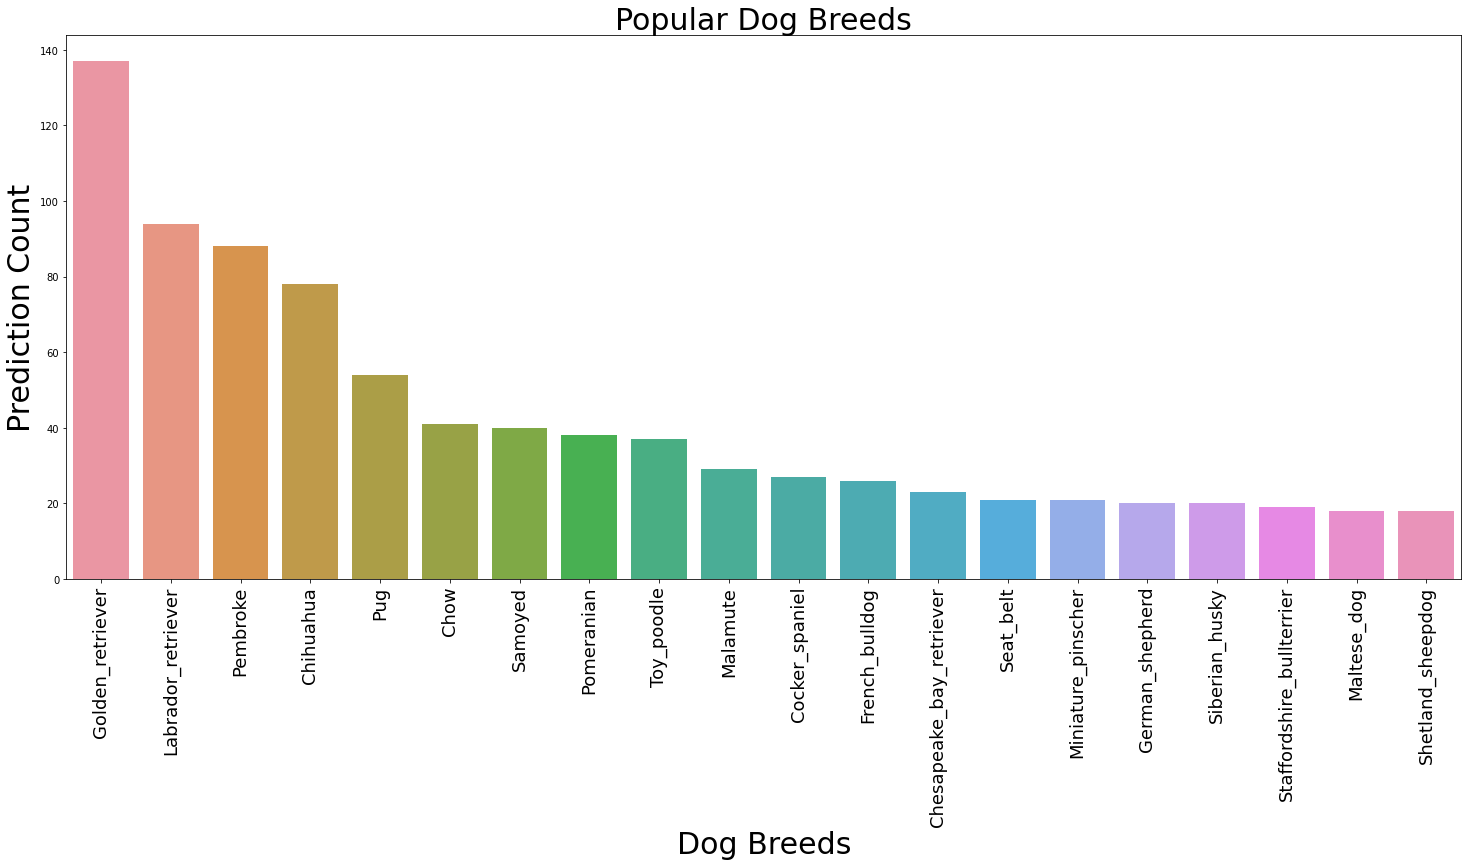

In [116]:
#check the dog with highest breed
plt.figure(figsize = (25,10))
ax = snb.barplot(x = df_saved_merged['first_prediction'].value_counts()[0:20].index,
                y= df_saved_merged['first_prediction'].value_counts()[0:20],
                data = df_saved_merged);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 18);
plt.xlabel('Dog Breeds', fontsize =30 );
plt.ylabel('Prediction Count', fontsize = 30);
plt.title('Popular Dog Breeds', fontsize = 30);

In [117]:
#check the numeric values by year
df_saved_merged.groupby('Year')['tweet_id'].count().sort_values(ascending = True)

Year
2017    354
2015    655
2016    962
Name: tweet_id, dtype: int64

<AxesSubplot:title={'center':'Tweet ID'}, ylabel='tweet_id'>

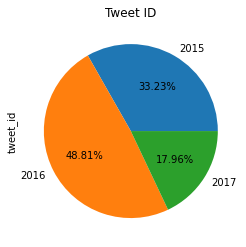

In [118]:
#Check users count base on year..2016 has more tweet than 2015 & 2017
df_saved_merged.groupby('Year')['tweet_id'].count().plot(kind = 'pie', title = 'Tweet ID', autopct = '%.2f%%')

# Lets check ratings by month

In [ ]:
#Rating using month
df_saved_merged.plot(y = 'rating_numerator', x = 'Month', style = 'o', alpha = .7)

In [ ]:
Ratings increased in november and december which implies in the winter there used to be favourable weather, 
the weather have influence on users which in return influence ratings count

# Lets check the users based on language

In [ ]:
#Check users count base on year..2016 has more tweet than 2015 & 2017
df_saved_merged.groupby('lang')['tweet_id'].count().plot(kind = 'bar', title = 'Tweet ID')

# Lets check the dog phase with favourite count and bar chart is good

In [ ]:
df_saved_merged.groupby('dog_phase')['favorite_count'].count().plot(kind = 'bar', title = 'Dog Phase')

# Conclussion

# Limitation